In [2]:
from numpy.random import default_rng         #  numpy randon number generator routines
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
#-------------------- The simulator, Create OU paths using EM  --------------------
def path_sim( X0, n, dt, T, a, sig, rng):
    """Simulate and return n independent paths for the Ornstein Unhelbeck with Z_n being standard normal random variables
       process dX_t = -a X_t dt + sig*dW_t.
    Arguments
    X0:  (type = float) start value of the paths, X[i,0] = X0
    n:   (type = int) the number of paths
    dt:  (type = float) time step for the simulator
    a:   (type = float) mean reversion parameter
    sig: (type = float) noise parameter
    rng: an instance of a random number generator: np.random.Generator
    return: (X,T) (type = tuple, (np array, np array))
            X = simuated paths, X[i,k] = step k of path i
            T = times T[k] = time of step k
      Note: X[:,0] = X0[:] (copy starting points) and T[0] = 0
    """    
#      adjust dt (make it slightly smaller) to get an integer number of steps

    nT = T/dt        #  "number" of time steps, but may not be an integer
    nT = int(nT+1)   #  round up to the nearest integer, the number of time steps
    dt = T/nT        #  adjust the time step down accordingly
    
    T = np.linspace( 0., T, nT+1)             # steps of size dt between 0 and T,
                                              # including 0 and T
    X = np.zeros( ( n, (nT+1)), np.float64)   #  allocate path array
    for i in range(n):
       X[i,0] = X0
    for k in range(nT):  # take a time step for all n paths at once
    
       X[:,k+1] = X[:,k] - a*X[:,k]*dt + rng.standard_normal(n)*sig*np.sqrt(dt) #let Z_n be standard normal
       
    return (X,T)  

In [4]:
#------------------ Setting Parameters ---------------------------------------------------

rng = default_rng()      # instantiate a bit generator

#    Parameters for the OU process being simulated

a   = -.2     # mean reversion parameter
sig = 1.     # noise amplitude
X0  = 0.     # starting point for simulated paths
dt  = 0.001 # simulation time step size

PathPlotFile    = "PathPics.pdf"      # filename for a picture of some paths
DensityPlotFile = "OU_densities.pdf"  # filename for a PDF plots

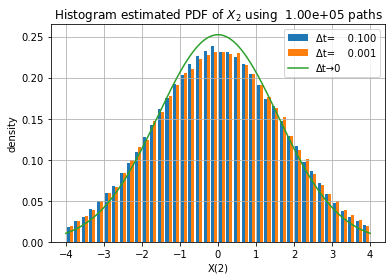

In [9]:
#------------------Main Program—PDF Visualization---------------------------------------------------
fig, ax = plt.subplots()     # Create a figure containing a single axes.

n_hist = 100000
n_bins = 40
X_hist = []
dt1=0.1
dt2=0.001
T2=2

X,T = path_sim( X0, n_hist, dt1, T2, a, sig, rng) # simulation with relatively large Δt
hist1 = "Δt={dt3:9.3f}".format(dt3=dt1)

nn,nT = X.shape
X_hist.append( X[:,nT-1] )

X,T = path_sim( X0, n_hist, dt2, T2, a, sig, rng) # simulation with small Δt
hist2 = "Δt={dt3:9.3f}".format(dt3=dt2)

nn,nT = X.shape
X_hist.append( X[:,nT-1] )

ax.hist(X_hist, bins = n_bins, range = (-4., 4.), density = True, label = [hist1,hist2])
ax.legend()
ax.grid()
plt.xlabel("X(2)")
plt.ylabel("density")
HistTitle = r'Histogram estimated PDF of $X_2$ using{n_hist:10.2e} paths'
HistTitle = HistTitle.format(n_hist=n_hist)
plt.title(HistTitle)

#x-axis ranges from -4 and 4 with .001 steps
xspace = np.arange(-4, 4, 0.001)
limit="Δt→0"

#plot normal distribution with mean 0 and variance 
ax.plot(xspace, norm.pdf(xspace, 0, np.sqrt(2.5)),label=limit)
ax.legend(loc='upper right')

plt.savefig(DensityPlotFile)
plt.show()

In [51]:
#-------------------- The simulator, Create OU paths using EM  --------------------
def path_sim( X0, n, dt, T, a, sig, rng):
    """Same as above except using different Zn for simulation this time.
    """    
#      adjust dt (make it slightly smaller) to get an integer number of steps

    nT = T/dt        #  "number" of time steps, but may not be an integer
    nT = int(nT+1)   #  round up to the nearest integer, the number of time steps
    dt = T/nT        #  adjust the time step down accordingly
    
    T = np.linspace( 0., T, nT+1)             # steps of size dt between 0 and T,
                                              # including 0 and T
    X = np.zeros( ( n, (nT+1)), np.float64)   #  allocate path array
    for i in range(n):
       X[i,0] = X0
    for k in range(nT):  # take a time step for all n paths at once
    
       X[:,k+1] = X[:,k] - a*X[:,k]*dt + (-np.log(rng.uniform(0,1,n))-1)*sig*np.sqrt(dt) #let Z_n be T_n -1
       
    return (X,T)  

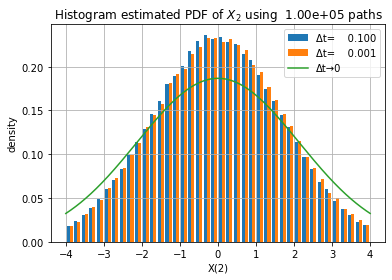

In [7]:
#------------------Main Program—PDF Visualization---------------------------------------------------
fig, ax = plt.subplots()     # Create a figure containing a single axes.

n_hist = 100000
n_bins = 40
X_hist = []
dt1=0.1
dt2=0.001
T2=2

X,T = path_sim( X0, n_hist, dt1, T2, a, sig, rng) # simulation with relatively large Δt
hist1 = "Δt={dt3:9.3f}".format(dt3=dt1)

nn,nT = X.shape
X_hist.append( X[:,nT-1] )

X,T = path_sim( X0, n_hist, dt2, T2, a, sig, rng) # simulation with small Δt
hist2 = "Δt={dt3:9.3f}".format(dt3=dt2)

nn,nT = X.shape
X_hist.append( X[:,nT-1] )

ax.hist(X_hist, bins = n_bins, range = (-4., 4.), density = True, label = [hist1,hist2])
ax.legend()
ax.grid()
plt.xlabel("X(2)")
plt.ylabel("density")
HistTitle = r'Histogram estimated PDF of $X_2$ using{n_hist:10.2e} paths'
HistTitle = HistTitle.format(n_hist=n_hist)
plt.title(HistTitle)

#x-axis ranges from -4 and 4 with .001 steps
xspace = np.arange(-4, 4, 0.001)
limit="Δt→0"

#plot normal distribution with mean 0 and variance 
ax.plot(xspace, norm.pdf(xspace, 0, np.sqrt(2.5*(np.exp(0.8))-1)),label=limit)
ax.legend(loc='upper right')

plt.savefig(DensityPlotFile)
plt.show()